In [3]:
import numpy as np

from BSE import market_session

%load_ext autoreload
%autoreload 1
%aimport BSE

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# k = 50
f = 0.8

for k in [4, 8, 16, 32, 64]:
    # for f in np.arange(0, 2.4, 0.4):
    f = round(f, 2)
    sellers_spec = [('PRDE', 15, {'k': k, 's_min': -1, 's_max': 1, 'F': f})]
    buyers_spec = [('PRDE', 15, {'k': k, 's_min': -1, 's_max': 1, 'F': f})]

    traders_spec = {'sellers': sellers_spec, 'buyers': buyers_spec}

    sup_range = (60, 60)
    dem_range = (140, 140)
    # plot_sup_dem(30, [sup_range], 30, [dem_range], 'fixed')

    start_time = 0
    end_time = 60 * 60 * 24 * 50
    supply_schedule = [{'from': start_time, 'to': end_time, 'ranges': [sup_range], 'stepmode': 'fixed'}]
    demand_schedule = [{'from': start_time, 'to': end_time, 'ranges': [dem_range], 'stepmode': 'fixed'}]

    order_interval = 5
    order_sched = {'sup': supply_schedule, 'dem': demand_schedule,
                'interval': order_interval, 'timemode': 'drip-jitter'}

    trial_id = f'k={k},F={f}'
    tdump = open(f'{trial_id}_avg_balance.csv','w')
    dump_all = False
    verbose = False

    market_session(trial_id, start_time, end_time, traders_spec, order_sched, tdump, dump_all, verbose)

    tdump.close()

B00: PRDE active_strat=[0]:
[0]: s=-0.689506, start=0.000000, $=0.000000, pps=0.000000
[1]: s=+0.198234, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.371335, start=0.000000, $=0.000000, pps=0.000000
[3]: s=-0.043602, start=0.000000, $=0.000000, pps=0.000000


B01: PRDE active_strat=[0]:
[0]: s=+0.212868, start=0.000000, $=0.000000, pps=0.000000
[1]: s=+0.644463, start=0.000000, $=0.000000, pps=0.000000
[2]: s=+0.176616, start=0.000000, $=0.000000, pps=0.000000
[3]: s=+0.515119, start=0.000000, $=0.000000, pps=0.000000


B02: PRDE active_strat=[0]:
[0]: s=+0.764459, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.352496, start=0.000000, $=0.000000, pps=0.000000
[2]: s=+0.323433, start=0.000000, $=0.000000, pps=0.000000
[3]: s=-0.847316, start=0.000000, $=0.000000, pps=0.000000


B03: PRDE active_strat=[0]:
[0]: s=+0.523433, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.014639, start=0.000000, $=0.000000, pps=0.000000
[2]: s=+0.532767, start=0.000000, $=0.000000, pps=0.0000

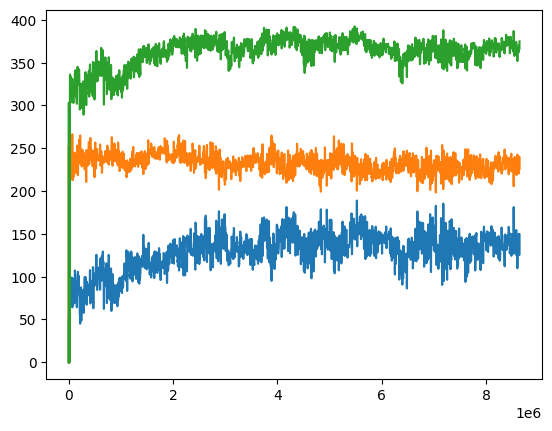

In [40]:
plot_profitability('test')